In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from functions import *

In [7]:
#dir = '/home/user/Desktop/Datos/'
dir = '/Users/antoniomendez/Desktop/Tesis/Datos/'

In [9]:
datos_2019 = pd.read_csv(f'{dir}datos_limpios/mibici/2019.csv')
data = datos_2019[datos_2019['Inicio_del_viaje'].str.startswith('2019-01')]
#estaciones = leer_matriz(f'{dir}Adj_mibici/matrices_estaciones/est_2019.txt')
users_counts = data['Usuario_Id'].value_counts()
users = users_counts.index.tolist()
est1 = np.sort(data['Origen_Id'].unique())
est2 = np.sort(data['Destino_Id'].unique())
est = np.unique(np.concatenate((est1, est2)))

In [10]:
def count_trips_mibici(data_user):
    viajes_user = data_user.groupby([data_user[['Origen_Id', 'Destino_Id']].min(axis=1), data_user[['Origen_Id', 'Destino_Id']].max(axis=1)]).size().reset_index(name='counts')
    viajes_user.columns = ['Est_A', 'Est_B', 'counts']
    total = viajes_user['counts'].sum()
    viajes_user['prob'] = viajes_user['counts']/total
    return viajes_user

In [11]:
viajes_data = {users[i]: count_trips_mibici(data[data['Usuario_Id'] == users[i]]) for i in range(len(users))}

In [12]:
def compute_entropy(viajes_user):
    entropy = -np.sum(viajes_user['prob']*np.log2(viajes_user['prob']))
    return entropy

In [13]:
entropies = {users[i]: compute_entropy(viajes_data[users[i]]) for i in range(len(users))}

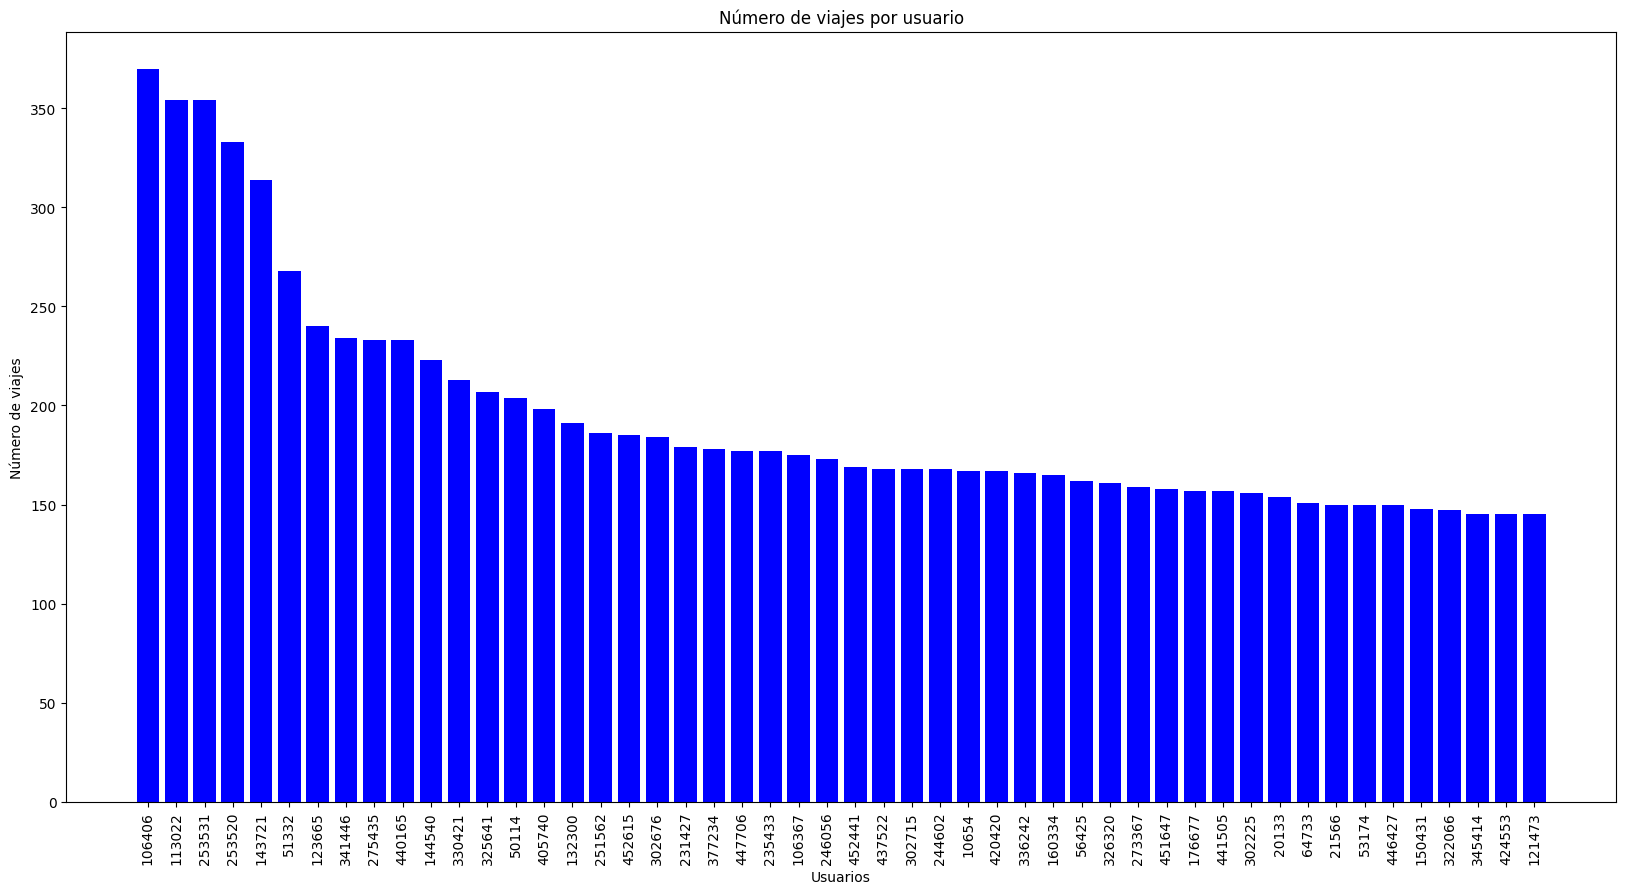

In [14]:
n = 50
plt.figure(figsize=(20, 10))
for i in range(n):
    plt.bar(i, viajes_data[users[i]]['counts'].sum(), color='blue')
plt.xlabel('Usuarios')
plt.xticks(range(n), users[:n], rotation=90)
plt.ylabel('Número de viajes')
plt.title('Número de viajes por usuario')
plt.show()

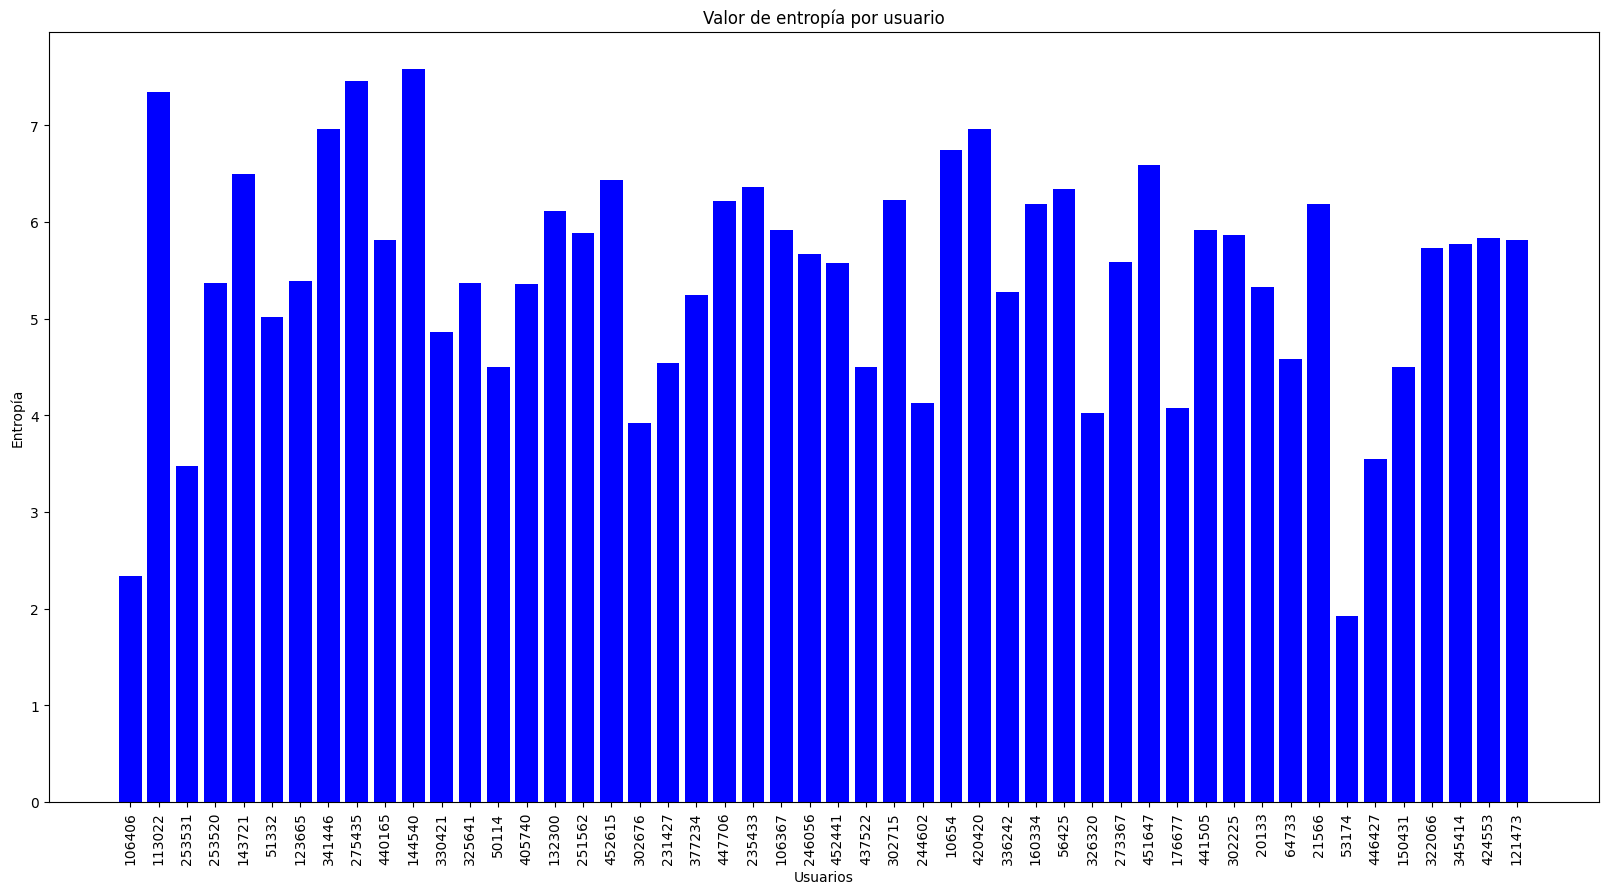

In [15]:
plt.figure(figsize=(20, 10))
for i in range(n):
    plt.bar(i, entropies[users[i]], color='blue')
plt.xlabel('Usuarios')
plt.xticks(range(n), users[:n], rotation=90)
plt.ylabel('Entropía')
plt.title('Valor de entropía por usuario')
plt.show()